### 2021 Spring "EE479: Scientific Computing & Data"

#### Yumin Song (KAIST EE Yong-Hoon Kim Group) 

#### Kutz 8.1 Finite Difference Methods

#### 2021. 05. 17 Revised 

### Finite diffence discretization

In this section, we solve specific elliptic partial differential equations with the finite difference methods. The quasi-two-dimensional motion of atmosphere can be modeled by the advection-diffusion behavior for the vorticity $ w(x,y,t) $ which is coupled to the streamfunction $ \psi  $ The governing equation in this case is 

$$ \frac{\partial{\omega}}{\partial{t}} + [\psi, \omega]  = \nu\nabla^{2}\omega    $$

where 
$$ [\psi, \omega] =  \frac{\partial{\psi}}{\partial{x}}\frac{\partial{\omega}}{\partial{y}} -  \frac{\partial{\psi}}{\partial{y}}\frac{\partial{\omega}}{\partial{x}}   $$

and $ \nabla^{2}= \partial_{x}^{2} +  \partial_{y}^{2}  $ is the two-dimensional Laplacian. we will proceed to solve this problem with periodic boundary conditions. This gives the following set of boundary conditions.

$$ \rho(-L,y) = \rho(L,y) $$
$$ \rho(x,-L) = \rho(x,L) $$
$$ \psi(-L,y) = \psi(L,y) $$
$$ \psi(x,-L) = \psi(x,L) $$

where computation domain $x \in [-L,L]  $ and  $y \in [-L,L]  $ 

#### Basic algorithm structure

The solution procedure is as follows:

##### 1. Elliptic solve 
Solve the elliptic problem $ \nabla^2\psi = \omega_{0} $ to find the streamfunction at time zero $ \psi(x,y,t=0) = \psi_{0}  $

##### 2. Time-stepping
Given initial $\omega_{0}$ and $\psi_{0}$, solve the advection-diffusion problem by time-stepping with a given method. The Euler method is illustrated below
$$ \omega(x,y,t+\Delta t)  = \omega(x,y,t)  + \Delta t( \nu \nabla^{2}\omega(x,y,t) - [\psi(x,y,t),\omega(x,y,t)] )  $$

##### 3. Loop
With the updated value of $\omega(x,y,\Delta{t})$, we can repeat the process by again solving for $ \psi(x,y,\Delta{t}) $ and updating the vorticity once again 

##### Step 1. Elliptic solve 

we begin by discretizing the elliptic solve problem. In second -order accurate central difference scheme, the elliptic equation reduces to 

$$ \nabla^{2}\psi = \frac{\partial^{2}\psi}{\partial{x}^{2}} +  \frac{\partial^{2}\psi}{\partial{y}^{2}}  = \omega $$

we use a second-order accurate central difference schme that elliptic equation reduces to 


$$  \frac{\psi(x+\Delta{x},y,t)-2\psi(x,y,t)+\psi(x-\Delta{x},y,t)}{{\Delta{x}}^{2}} + \frac{\psi(x,y+\Delta{y},t)-2\psi(x,y,t)+\psi(x,y-\Delta{y},t)}{{\Delta{y}}^{2}}  = \omega(x,y,t) $$


Below figure illustrates the stencil which used in discretization. 
We denote 

$$ \psi_{mn} = \psi(x_m,y_n,t) $$

$$ -4\psi_{mn}+\psi_{(m-1)n}+\psi_{(m+1)n}+\psi_{(m)(n-1)}+\psi_{m(n+1)} = \delta^2\omega_{mn} $$

where $\Delta{x}^2 = \Delta{y}^2 =\delta^2 $

<img style="float: middle;" src="finite.JPG" width="600">

For this case, we have the following sets of equations in $4 \times 4 $ system.

$$ -4\psi_{11}+\psi_{41}+\psi_{21}+\psi_{14}+\psi_{12} =  \delta^2\omega_{11} $$
$$ -4\psi_{12}+\psi_{42}+\psi_{22}+\psi_{11}+\psi_{13} =  \delta^2\omega_{12} $$
$$\vdots$$
$$ -4\psi_{21}+\psi_{11}+\psi_{31}+\psi_{24}+\psi_{22} =  \delta^2\omega_{21} $$
$$\vdots$$

which results in the sparse matrix (banded matrix) system
$$ A\psi =\delta^{2} \omega  $$ 
where

<img style="float: middle;" src="matrix.JPG" width="600">

and 
$$ \psi =( \psi_{11}\psi_{12}\psi_{13}\psi_{14}\psi_{21}\psi_{22}\psi_{23}\psi_{24}\psi_{31}\psi_{32}\psi_{33}\psi_{34}\psi_{41}\psi_{42}\psi_{43}\psi_{44})^T   $$
$$ \omega =( \omega_{11}\omega_{12}\omega_{13}\omega_{14}\omega_{21}\omega_{22}\omega_{23}\omega_{24}\omega_{31}\omega_{32}\omega_{33}\omega_{34}\omega_{41}\omega_{42}\omega_{43}\omega_{44})^T   $$

##### Step 2. Time-stepping 

$\psi(x,y,t)$ is updated value along with the current value of the voricity to take a time-step $\Delta{t}$ into the future.
$$ \frac{\partial{\omega}}{\partial{t}} + [\psi, \omega]  = \nu\nabla^{2}\omega    $$

Using the definition of the braketed term and the Laplacian, this equation is 
$$ \frac{\partial{\omega}}{\partial{t}} = \frac{\partial{\psi}}{\partial{y}}\frac{\partial{\omega}}{\partial{x}}  - \frac{\partial{\psi}}{\partial{x}}\frac{\partial{\omega}}{\partial{y}} + \nu(\frac{\partial{\omega^{2}}}{\partial{x}^2} +  \frac{\partial{\omega^{2}}}{\partial{y}^2})   $$

Second-order central-differencing discretization then yields

$$ \frac{\partial\omega}{\partial t} = (\frac{\psi(x,y+\Delta{y},t)-\psi(x,y-\Delta{y},t)}{{2\Delta{y}}})(\frac{\omega(x+\Delta{x},y,t)-\omega(x-\Delta{x},y,t)}{{2\Delta{x}}}) - (\frac{\psi(x+\Delta{x},y,t)-\psi(x-\Delta{x},y,t)}{{2\Delta{x}}})(\frac{\omega(x,y+\Delta{y},t)-\omega(x,y-\Delta{y},t)}{{2\Delta{y}}}) + \nu(\frac{\omega(x+\Delta{x},y,t)-2\omega(x,y,t)+\omega(x-\Delta{x},y,t)}{{\Delta{x}}^{2}} +\frac{\omega(x,y+\Delta{y},t)-2\omega(x,y,t)+\omega(x,y-\Delta{y},t)}{{\Delta{y}}^{2}} )    $$




This can be stepped forward in time with any convenient time-stepping algorithm such as fourth-order Runge-Kutta. Once we have updated the value of the vorticity, we must again update the value of the streamfunction to once again update the vorticity. This loop continues until the solution at the desired future time is achieved.

<img style="float: middle;" src="stencil.JPG" width="600">

The initial condition used in this simulation is 

$ \omega_{0} = \omega(x,y,t=0) = exp(-2x^2 -\frac{y^2}{20})   $

This stretched Gaussian is seen to rotate while advecting and diffusing vorticity.

The code implementation is as follows:

Size of A matrix = 2500


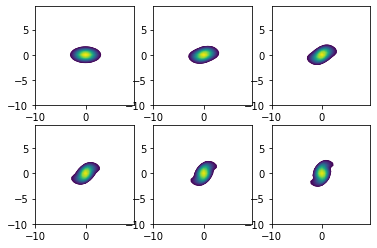

In [16]:
import numpy as np
import scipy.sparse.linalg as linag
import time
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

N=2500
########################################### A Matrix construct 
I2 = -4*np.eye(N)
E = np.diag(np.ones((N-1)), k=1)
E2 = np.diag( np.ones(int(np.sqrt(N))), N-int(np.sqrt(N))  )
E3 = np.diag( np.ones(N-int(np.sqrt(N))), int(np.sqrt(N))  )
A = I2 + E + E.T +E2 + E2.T + E3 + E3.T
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0
################################# 8.5 Overcoming Computational difficulties
#A[0,0] = 0 
###################################### Gradient matrix construct #####
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0

A_gx1 =  np.diag(np.ones((N-1)), k=1)
A_gx =  A_gx1 - A_gx1.T
for i in range(int(np.sqrt(N))):  
    A_gx[ int(np.sqrt(N))*(i) , int(np.sqrt(N))*i-1] = 0
    A_gx[ int(np.sqrt(N))*i, int(np.sqrt(N))*(i+1)-1] = -1
    A_gx[ int(np.sqrt(N))*i-1,  int(np.sqrt(N))*(i) ] = 0
    A_gx[ int(np.sqrt(N))*(i+1)-1, int(np.sqrt(N))*i] = 1
    
A_gy1 =   np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N)))
A_gy2 =  -np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N)))
A_gy3 =  -np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N))).T
A_gy4 =   np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N))).T
A_gy = A_gy1 + A_gy2 + A_gy3 + A_gy4
##################################################################

x2 = np.linspace(-10,10,int(np.sqrt(N))+1)
y2 = np.linspace(-10,10,int(np.sqrt(N))+1)
x=x2[0:len(x2)-1];
y=y2[0:len(y2)-1];
[X,Y]=np.meshgrid(x,y);
b = 1*np.exp(-0.25*X**2-Y**2);
#b= b.reshape(N,1)
test_b = np.zeros((int(np.sqrt(N)),int(np.sqrt(N))))
test_b[:,:] = np.sum(b) / int(np.sqrt(N)) / int(np.sqrt(N))
b = b - test_b
w= b.reshape(N,1)
#print('test_2b sum=',np.sum(b))
h = x[1]-x[0]
#print('h=',h)
A = A / h / h
A_gx = A_gx / (2*h)
A_gy = A_gy / (2*h)

print('Size of A matrix =', len(A))

def conjGrad(A,x,b,tol,N): #input: A(matrix) x(initial),tol(tolerence),N(matrix size)
    r = b - A.dot(x)
    p = r.copy()
    for i in range(N):
        Ap = A.dot(p)
        alpha = np.dot(p.T,r)/np.dot(p.T,Ap)
        x = x + alpha*p
        r = b - A.dot(x)
        if np.sqrt(np.sum((r**2))) < tol:
            break
        else:
            beta = -np.dot(r.T,Ap)/np.dot(p.T,Ap)
            p = r + beta*p
    return x 

x0 = np.zeros((N,1)) # initial guess
nu=0.001  # vorticity 
wt2 = w
wt2 = wt2.reshape(N,order='F')

def spc_rhs(t,wt2):
    wt2 = wt2.reshape(N,1,order='F')
 #   psi = conjGrad(A,x0,wt2,10**(-5),10000000) 
    lu, piv = lu_factor(A)
    psi = lu_solve((lu, piv), wt2)
    psi = psi.reshape(N,1)
    wt2 = A_gy.dot(psi) * A_gx.dot(wt2)   -  A_gx.dot(psi) * A_gy.dot(wt2) + nu*A.dot(wt2)
    wt2 = wt2.reshape(N,order='F')
    rhs = wt2
    return rhs

from scipy.integrate import solve_ivp

sol = solve_ivp (spc_rhs,[0,10], wt2, t_eval=[0, 2, 4, 6, 8,10] )

T = sol.t
F = sol.y
tspan = np.linspace(0,10,6)
levels = np.linspace(0.1,1,100)
for j in range(len(tspan)):
    plt.subplot(2,3,j+1)
    wf = (F[:,j].reshape(int(np.sqrt(N)),int(np.sqrt(N)))).real
    CS = plt.contour(X, Y, wf, levels)   # set levels automatically
   # plt.colorbar()

In this code, for step 1. we use LU decomposition which is direct method  for solving $Ax=b$. 
 In step 2. we use scipy.integrate.solve_ivp for calculating time-stepping ordinary differential equation. Using the input function 'spc_rhs', streamfunction is updated when volticity updated.

From the result, we can find the vorticity is rotate as times goes on(0s,2s,4s,6s,8s,10s).